In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-08-02 08:49:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-02 08:49:41 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")


--2022-08-02 08:49:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   233MB/s    in 0.7s    

2022-08-02 08:49:44 (233 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.25387756e+02 8.73877563e+01 4.83877563e+01]
   [1.25596939e+02 9.05969391e+01 5.25969391e+01]
   [1.25831642e+02 9.15510254e+01 5.40561218e+01]
   ...
   [2.33214264e+02 1.96214264e+02 1.51428528e+02]
   [2.32857117e+02 1.95857117e+02 1.50857117e+02]
   [2.29071503e+02 1.95071503e+02 1.49071503e+02]]

  [[1.22979591e+02 8.79795914e+01 4.72653046e+01]
   [1.33877548e+02 9.97397995e+01 6.26020470e+01]
   [1.55357147e+02 1.22484695e+02 8.67295990e+01]
   ...
   [2.34142838e+02 1.97142838e+02 1.52357101e+02]
   [2.34714264e+02 1.97714264e+02 1.52714264e+02]
   [2.33571503e+02 1.96571503e+02 1.51571503e+02]]

  [[1.45500000e+02 1.12000000e+02 7.17857132e+01]
   [1.62862244e+02 1.30403076e+02 9.54897995e+01]
   [1.73571426e+02 1.42923477e+02 1.14183670e+02]
   ...
   [2.36025497e+02 1.97117325e+02 1.54499985e+02]
   [2.35056091e+02 1.96056091e+02 1.53056091e+02]
   [2.33500076e+02 1.94500076e+02 1.51500076e+02]]

  ...

  [[2.40214264e+02 2.33000000e+02 2.13571472e+02]
   [2

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False



16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
x=base_model(inputs)
print(f'The output shape after passing the inputs is {x.shape}')
x=tf.keras.layers.GlobalAveragePooling2D(name='pooling_layer')(x)
print(f'The output shape after passing through the pooling layer is {x.shape}')
outputs=tf.keras.layers.Dense(10, activation='softmax',name="output_layer")(x)

model_0=tf.keras.Model(inputs,outputs)

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0=model_0.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data_10_percent,
                      validation_steps=len(test_data_10_percent),
                      callbacks=[create_tensorboard_callback(dir_name='functional_api',
                                                           experiment_name='efficientnetb0')])

The output shape after passing the inputs is (None, 7, 7, 1280)
The output shape after passing through the pooling layer is (None, 1280)
Saving TensorBoard log files to: functional_api/efficientnetb0/20220802-084953
Epoch 1/5
24/24 [==============================] - 33s 419ms/step - loss: 1.8706 - accuracy: 0.4360 - val_loss: 1.3070 - val_accuracy: 0.7388
Epoch 2/5
24/24 [==============================] - 8s 329ms/step - loss: 1.1253 - accuracy: 0.7693 - val_loss: 0.9059 - val_accuracy: 0.8072
Epoch 3/5
24/24 [==============================] - 8s 322ms/step - loss: 0.8295 - accuracy: 0.8053 - val_loss: 0.7387 - val_accuracy: 0.8228
Epoch 4/5
24/24 [==============================] - 8s 320ms/step - loss: 0.6769 - accuracy: 0.8400 - val_loss: 0.6579 - val_accuracy: 0.8376
Epoch 5/5
24/24 [==============================] - 9s 354ms/step - loss: 0.5905 - accuracy: 0.8680 - val_loss: 0.6040 - val_accuracy: 0.8404


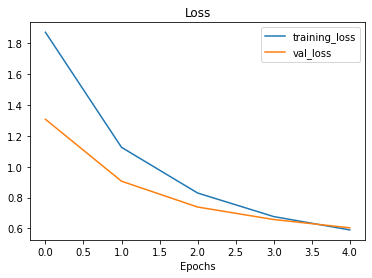

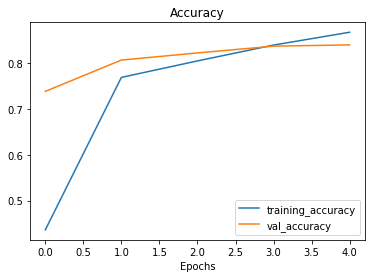

In [ ]:
plot_loss_curves(history_0)

In [ ]:
input_tensor=(1,2,3,4)
input_tensor=tf.random.normal(input_tensor)
max_pooled=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(input_tensor.shape)
print(max_pooled.shape)
print(input_tensor)
print(max_pooled)

(1, 2, 3, 4)
(1, 4)
tf.Tensor(
[[[[-0.7695031   1.2573951  -0.14696449  1.9036497 ]
   [-0.5276237  -0.110921   -0.6443558   1.4255183 ]
   [ 3.1099033  -0.28673056 -0.8834087  -0.77119845]]

  [[-2.4579878   0.5161663  -1.2458508  -1.5777798 ]
   [-1.5087285   1.9934642   0.68805903 -1.120814  ]
   [ 0.32506812 -1.2374046   0.7798724  -1.8977455 ]]]], shape=(1, 2, 3, 4), dtype=float32)
tf.Tensor([[-0.30481192  0.3553283  -0.24210806 -0.33972833]], shape=(1, 4), dtype=float32)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.30481192,  0.3553283 , -0.24210806, -0.33972833]],
      dtype=float32)>

In [ ]:
max_pooled_2=tf.keras.layers.GlobalMaxPooling2D()(input_tensor)

In [ ]:
print(max_pooled)

tf.Tensor([[-0.30481192  0.3553283  -0.24210806 -0.33972833]], shape=(1, 4), dtype=float32)


In [ ]:
print(max_pooled_2)

tf.Tensor([[3.1099033 1.9934642 0.7798724 1.9036497]], shape=(1, 4), dtype=float32)


In [ ]:
tf.reduce_max(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[3.1099033, 1.9934642, 0.7798724, 1.9036497]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2022-08-02 08:51:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   176MB/s    in 0.7s    

2022-08-02 08:51:07 (176 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent='10_food_classes_1_percent/train/'
test_dir='10_food_classes_1_percent/test/'

In [ ]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There a

In [ ]:
IMG_SZIE=(224,224)
BATCH_SIZE=32

train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=BATCH_SIZE,
                                                                         label_mode='categorical')
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=BATCH_SIZE,
                                                                         label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation=keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),                               
], name='data_augmentation')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

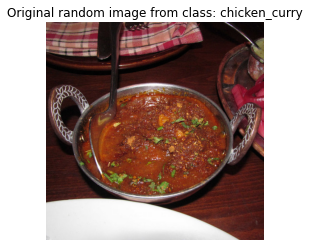

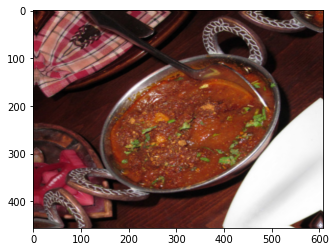

In [ ]:
target_class=random.choice(train_data_1_percent.class_names)
target_dir=train_dir_1_percent + '/' + target_class
random_image = random.choice(os.listdir(target_dir))
img=target_dir + '/' + random_image
img_show = mpimg.imread(img)
plt.imshow(img_show)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

plt.figure()
augmented_img=data_augmentation(img_show,training=True)

plt.imshow(augmented_img/255.)

In [ ]:
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220802-085114
Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 2.3919 - accuracy: 0.1000 - val_loss: 2.2766 - val_accuracy: 0.1628
Epoch 2/5
3/3 [==============================] - 3s 2s/step - loss: 2.1700 - accuracy: 0.1857 - val_loss: 2.1602 - val_accuracy: 0.2270
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9937 - accuracy: 0.3571 - val_loss: 2.0529 - val_accuracy: 0.2977
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8556 - accuracy: 0.4000 - val_loss: 1.9465 - val_accuracy: 0.3717
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6922 - accuracy: 0.5429 - val_loss: 1.8454 - val_accuracy: 0.4391


In [ ]:
train_dir_10_percent='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf
IMG_SIZE
BATCH_SIZE

32

In [ ]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation=tf.keras.Sequential([
 tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
 tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
 tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
 tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
 tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
],name='data_augmentation')

In [ ]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [ ]:
inputs=layers.Input(shape=input_shape,
                    name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='Global_average_ppoling_2D')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
checkpoint_path='model_10_percent_checkpoint/checkpoint.ckpt'
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)

In [ ]:
initial_epochs=5
history_2_10_percent = model_2.fit(train_data_10_percent,
                                   epochs=initial_epochs,
                                   steps_per_epoch=len(train_data_1_percent),
                                   validation_data=test_data,
                                   validation_steps=int(0.25* len(test_data)),
                                   callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                              checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220802-085902
Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.4199 - accuracy: 0.1042
Epoch 1: saving model to model_10_percent_checkpoint/checkpoint.ckpt
3/3 [==============================] - 12s 3s/step - loss: 2.4199 - accuracy: 0.1042 - val_loss: 2.3164 - val_accuracy: 0.1135
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 2.3592 - accuracy: 0.0938
Epoch 2: saving model to model_10_percent_checkpoint/checkpoint.ckpt
3/3 [==============================] - 3s 1s/step - loss: 2.3592 - accuracy: 0.0938 - val_loss: 2.1932 - val_accuracy: 0.1645
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 2.1880 - accuracy: 0.2292
Epoch 3: saving model to model_10_percent_checkpoint/checkpoint.ckpt
3/3 [==============================] - 3s 1s/step - loss: 2.1880 - accuracy: 0.2292 - val_loss: 2.0623 - val_accuracy: 0.2632
Epoch 4/5
3/3 [==============================] - ETA: 

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 1.8283 - accuracy: 0.4524


[1.8283263444900513, 0.45239999890327454]

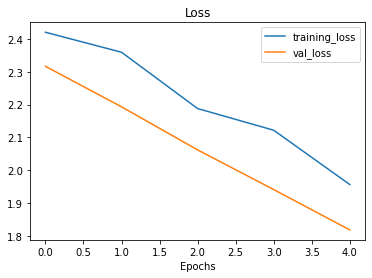

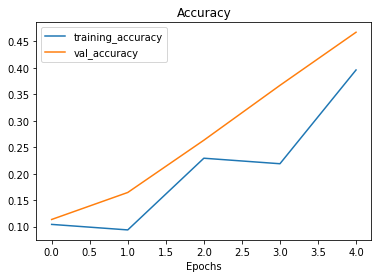

In [ ]:
plot_loss_curves(history_2_10_percent)

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
mod_2_new_eval=model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.8283 - accuracy: 0.4524


In [ ]:
base_model.layers

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

In [ ]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_2_10_percent.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) 

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220802-095627
Epoch 5/10
24/24 [==============================] - 20s 504ms/step - loss: 1.6251 - accuracy: 0.5440 - val_loss: 1.2257 - val_accuracy: 0.6727
Epoch 6/10
24/24 [==============================] - 10s 370ms/step - loss: 1.1148 - accuracy: 0.7093 - val_loss: 0.8647 - val_accuracy: 0.7401
Epoch 7/10
24/24 [==============================] - 11s 446ms/step - loss: 0.8574 - accuracy: 0.7533 - val_loss: 0.7128 - val_accuracy: 0.7599
Epoch 8/10
24/24 [==============================] - 9s 381ms/step - loss: 0.7243 - accuracy: 0.7853 - val_loss: 0.6661 - val_accuracy: 0.7878
Epoch 9/10
24/24 [==============================] - 8s 322ms/step - loss: 0.6500 - accuracy: 0.7947 - val_loss: 0.6501 - val_accuracy: 0.7812
Epoch 10/10
24/24 [==============================] - 9s 340ms/step - loss: 0.5411 - accuracy: 0.8320 - val_loss: 0.6448 - val_accuracy: 0.7697


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.5876 - accuracy: 0.8000


[0.5876047015190125, 0.800000011920929]

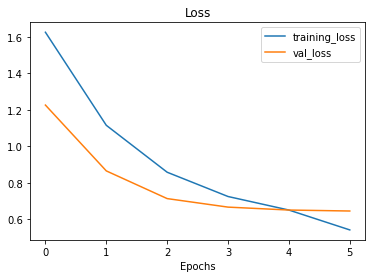

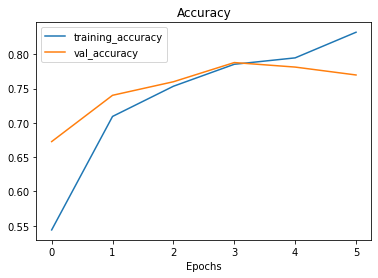

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
def compare_historys(original_history,new_history,initial_epohs=5):
  acc=original_history.history['accuracy']
  loss=original_history.history['loss']
  
  val_acc=original_history.history['val_accuracy']
  val_loss=original_history.history['val_loss']

  total_acc=acc+ new_history.history['accuracy']
  total_loss=loss+new_history.history['loss']

  total_val_acc=val_acc+ new_history.history['val_accuracy']
  total_val_loss=val_loss+new_history.history['loss']
  
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

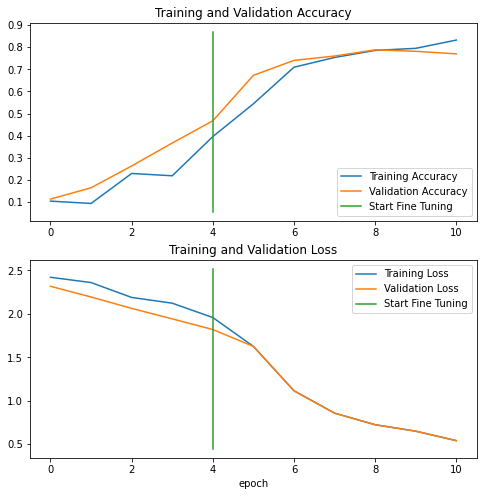

In [ ]:
compare_historys(original_history=history_2_10_percent,
                 new_history=history_fine_10_percent_data_aug)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2022-08-02 10:52:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  60.5MB/s    in 6.5s    

2022-08-02 10:52:30 (75.9 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
train_dir_100_percent='/content/10_food_classes_all_data/train'
test_dir='/content/10_food_classes_all_data/test'

In [ ]:
train_data_100_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_100_percent,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation=tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)                                    
])

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=layers.Input(shape=input_shape,
                    name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='Global_average_ppoling_2D')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

model_4=tf.keras.Model(inputs,outputs)

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
initial_epochs=5
hist_4_og=model_4.fit(train_data_100_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_100_percent),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[create_tensorboard_callback('transfer_learning', '100_per_train_data_model')])

Saving TensorBoard log files to: transfer_learning/100_per_train_data_model/20220802-105324
Epoch 1/5
235/235 [==============================] - 49s 197ms/step - loss: 0.9674 - accuracy: 0.7244 - val_loss: 0.5124 - val_accuracy: 0.8484
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 0.6883 - accuracy: 0.7881 - val_loss: 0.4315 - val_accuracy: 0.8660
Epoch 3/5
235/235 [==============================] - 40s 167ms/step - loss: 0.6222 - accuracy: 0.8024 - val_loss: 0.3984 - val_accuracy: 0.8776
Epoch 4/5
235/235 [==============================] - 39s 163ms/step - loss: 0.5760 - accuracy: 0.8185 - val_loss: 0.3767 - val_accuracy: 0.8812
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.5448 - accuracy: 0.8273 - val_loss: 0.3647 - val_accuracy: 0.8860


In [ ]:
for layer in base_model.layers[:-10]:
  layer.trainable = False


In [ ]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_4_new = model_2.fit(train_data_10_percent,
                            epochs=fine_tune_epochs,
                            validation_data=test_data,
                            initial_epoch=hist_4_og.epoch[-1], # start from previous last epoch
                            validation_steps=int(0.25 * len(test_data)),
                            callbacks=[create_tensorboard_callback("transfer_learning", "100_percent_fine_tune_last_10")]) 

Saving TensorBoard log files to: transfer_learning/100_percent_fine_tune_last_10/20220802-105759
Epoch 5/10
24/24 [==============================] - 8s 295ms/step - loss: 0.1933 - accuracy: 0.9493 - val_loss: 0.4953 - val_accuracy: 0.8306
Epoch 6/10
24/24 [==============================] - 5s 192ms/step - loss: 0.1771 - accuracy: 0.9547 - val_loss: 0.5050 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 5s 204ms/step - loss: 0.1663 - accuracy: 0.9667 - val_loss: 0.4524 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - 5s 194ms/step - loss: 0.1923 - accuracy: 0.9533 - val_loss: 0.4729 - val_accuracy: 0.8388
Epoch 9/10
24/24 [==============================] - 6s 220ms/step - loss: 0.1662 - accuracy: 0.9560 - val_loss: 0.5281 - val_accuracy: 0.8289
Epoch 10/10
24/24 [==============================] - 6s 257ms/step - loss: 0.1697 - accuracy: 0.9587 - val_loss: 0.5302 - val_accuracy: 0.8191


In [ ]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.3647 - accuracy: 0.8860


[0.36472734808921814, 0.8859999775886536]

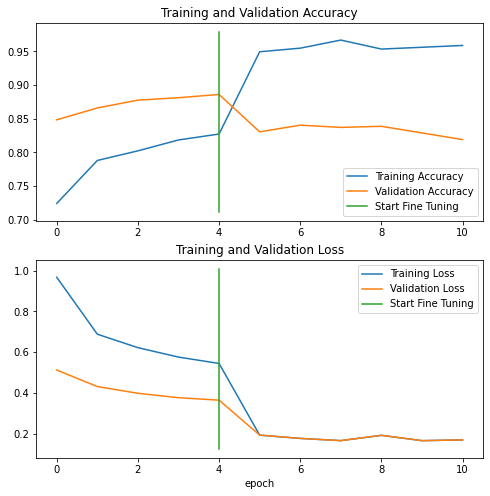

In [ ]:
compare_historys(original_history=hist_4_og,
                 new_history=history_4_new)